### Part 1 : Voronoi mesh generation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
#adding path to source directory
sys.path.insert(0, '../voronoiMeshMF6')
import geopandas as gpd
from geoVoronoi import createVoronoi
from geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList


In [2]:

#Create mesh object
vorMesh = createVoronoi()

#Define base refinement and refinement levels
vorMesh.defineParameters(maxRef = 50, minRef=5, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../examples/trenchExcavation/Shp/modelAoi.shp')
vorMesh.addLayer('ghb','../examples/trenchExcavation/Shp/compoundGhb.shp')
vorMesh.addLayer('wel','../examples/trenchExcavation/Shp/pumpingWells.shp')
vorMesh.addLayer('drn','../examples/trenchExcavation/Shp/trenchExcavationDissolved.shp')

#Generate point pair array
vorMesh.extractOrgVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()

#check or create an output folder
outPath = '../examples/trenchExcavation/output'
if os.path.isdir(outPath):
    print('The output folder %s exists'%outPath)
else:
    os.mkdir(outPath)
    print('The output folder %s has been generated.'%outPath)

#Export point data and voronoi polygons
#Points
# vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
# vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
# vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
# vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
# vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
# vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')



/--------Sumary of cell discretization-------/
Maximun refinement progressive: 40.62 m.
Maximun refinement coarse areas: 50.00 m.
Minimum refinement: 5.00 m.
Cell size list: [ 5.    12.5   23.75  40.625] m.
/--------------------------------------------/


/----Sumary of points for voronoi meshing----/
Distributed points from layers: 986
Points from layer buffers: 1986
Points from max refinement areas: 1097
Points from min refinement areas: 3960
Total points inside the limit: 7273
/--------------------------------------------/

Time required for point generation: 0.85 seconds 

The output folder ../examples/trenchExcavation/output exists


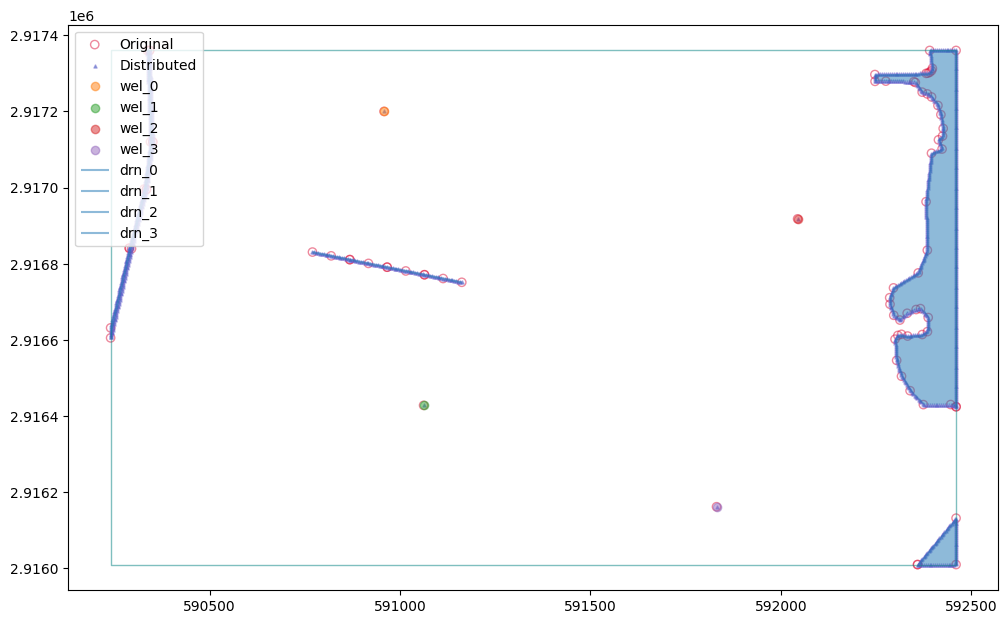

In [3]:
plotOrgDistPoints(vorMesh)


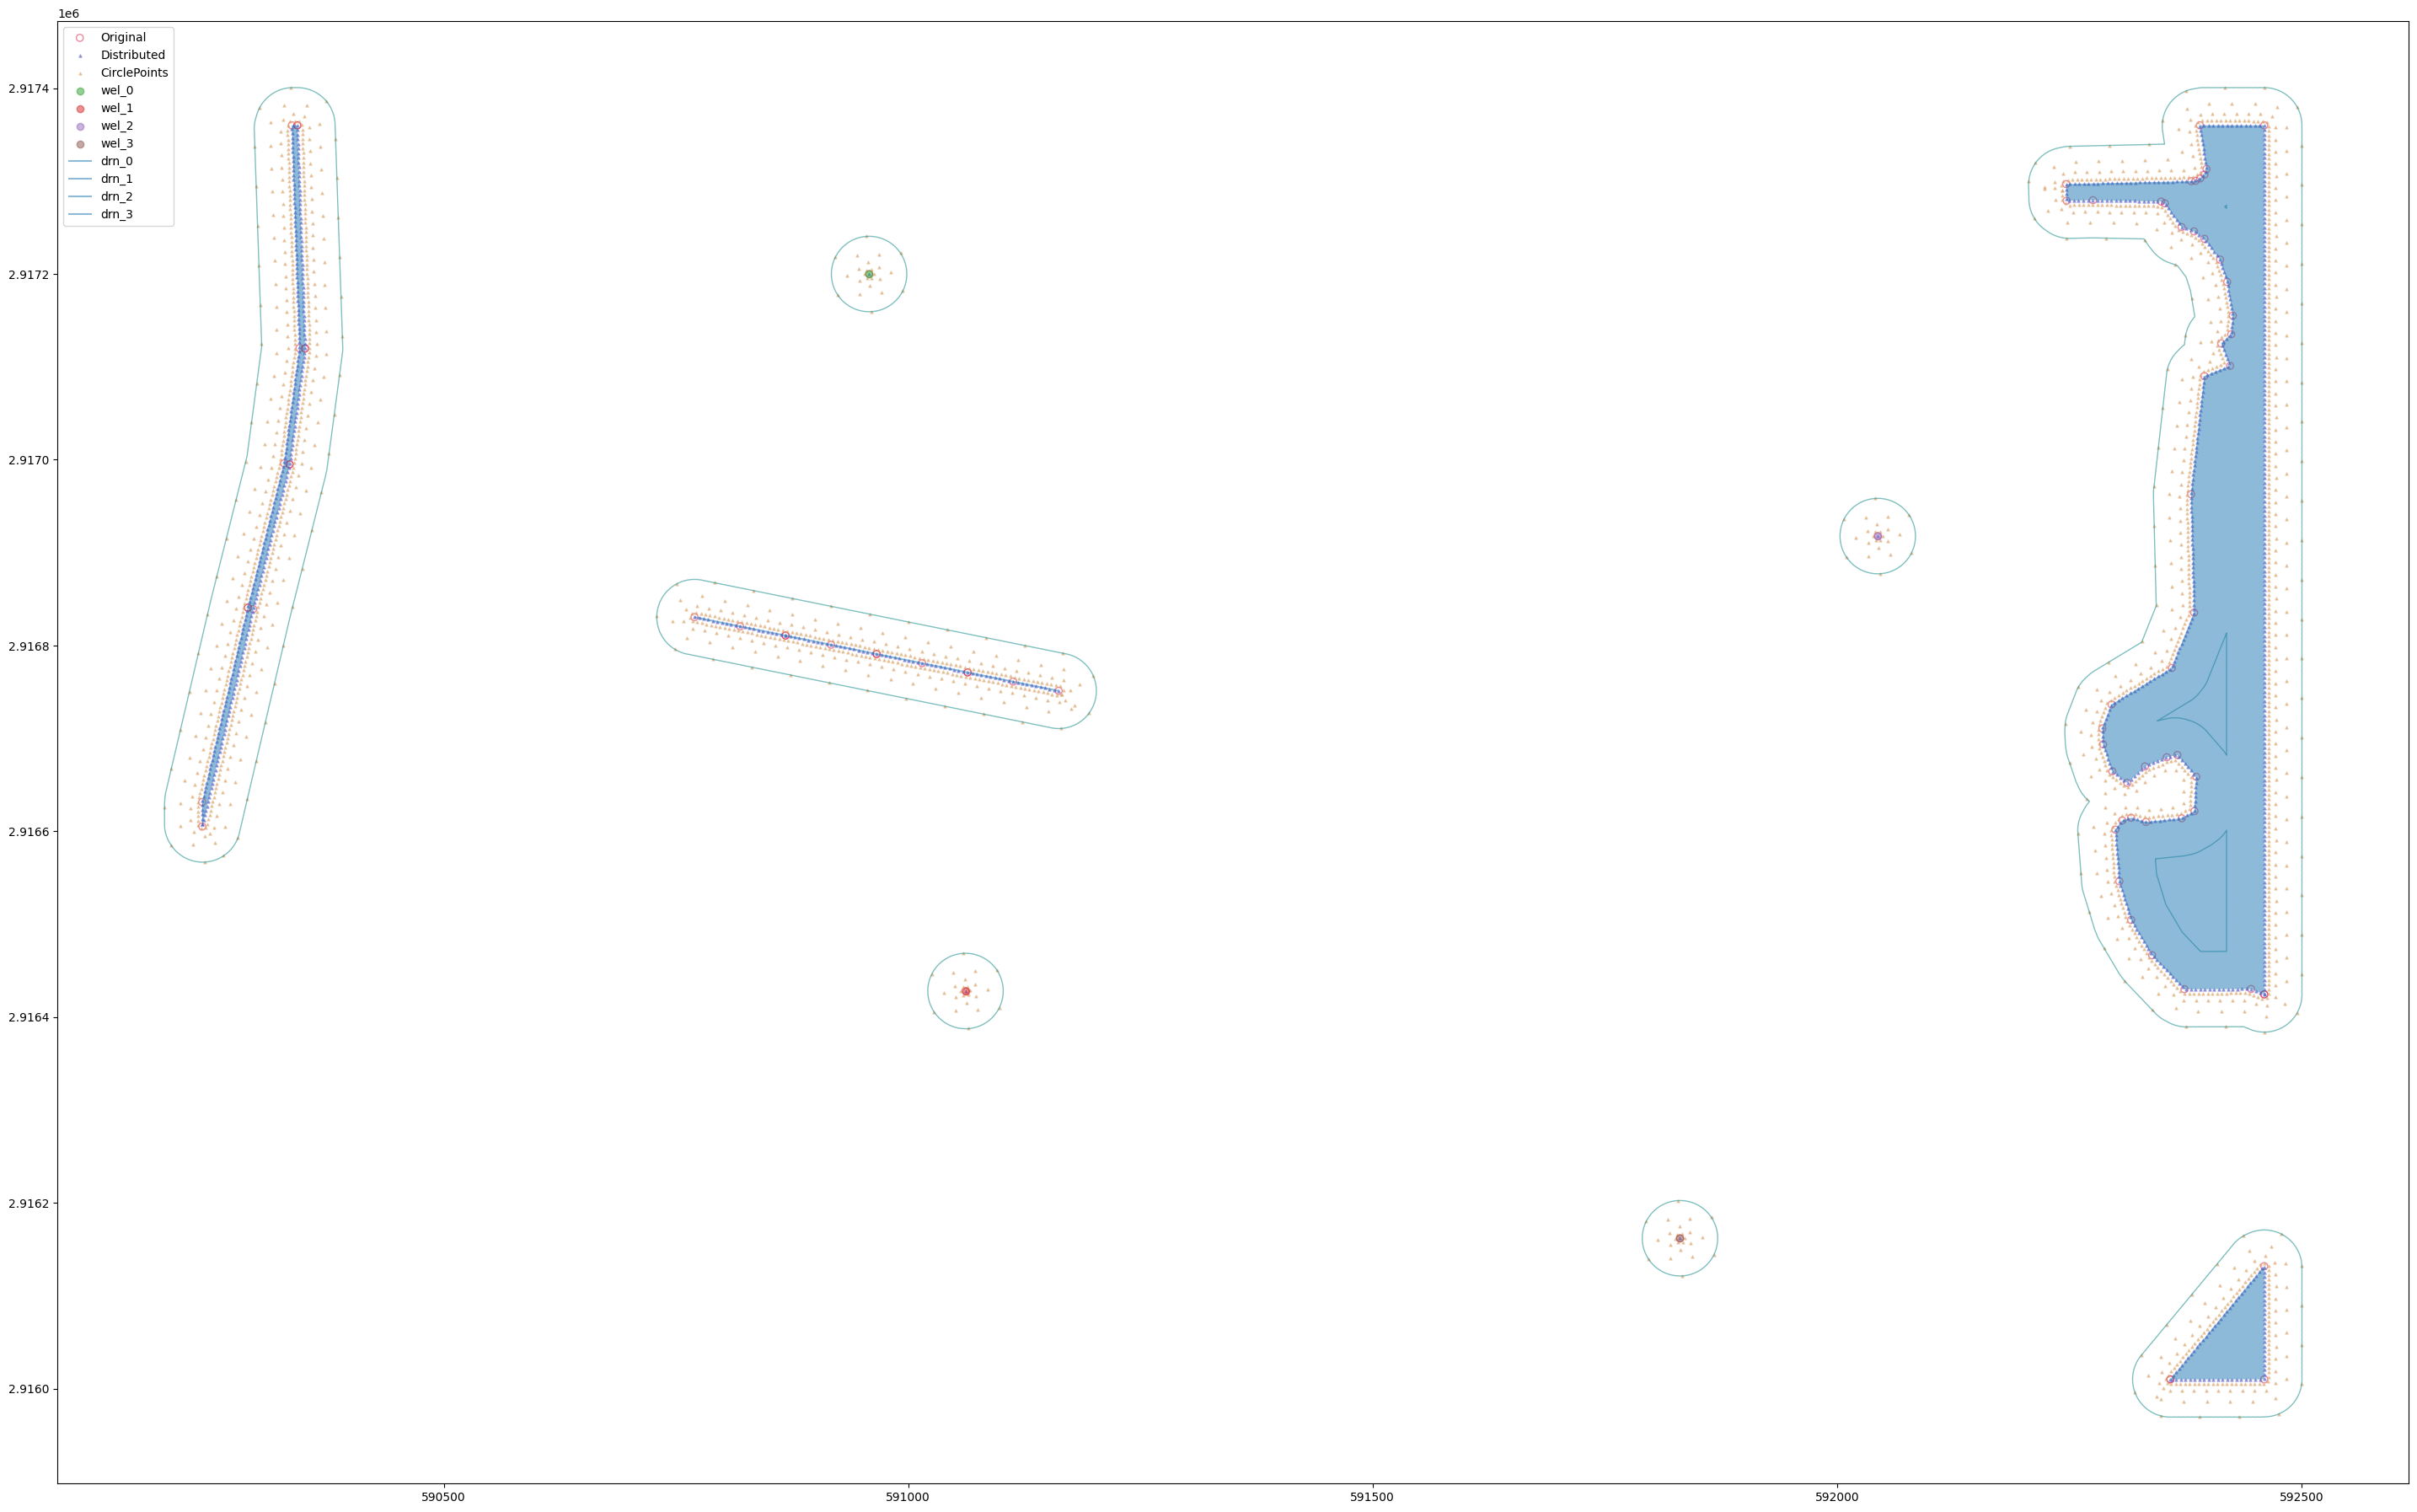

In [4]:
plotCirclesPoints(vorMesh)

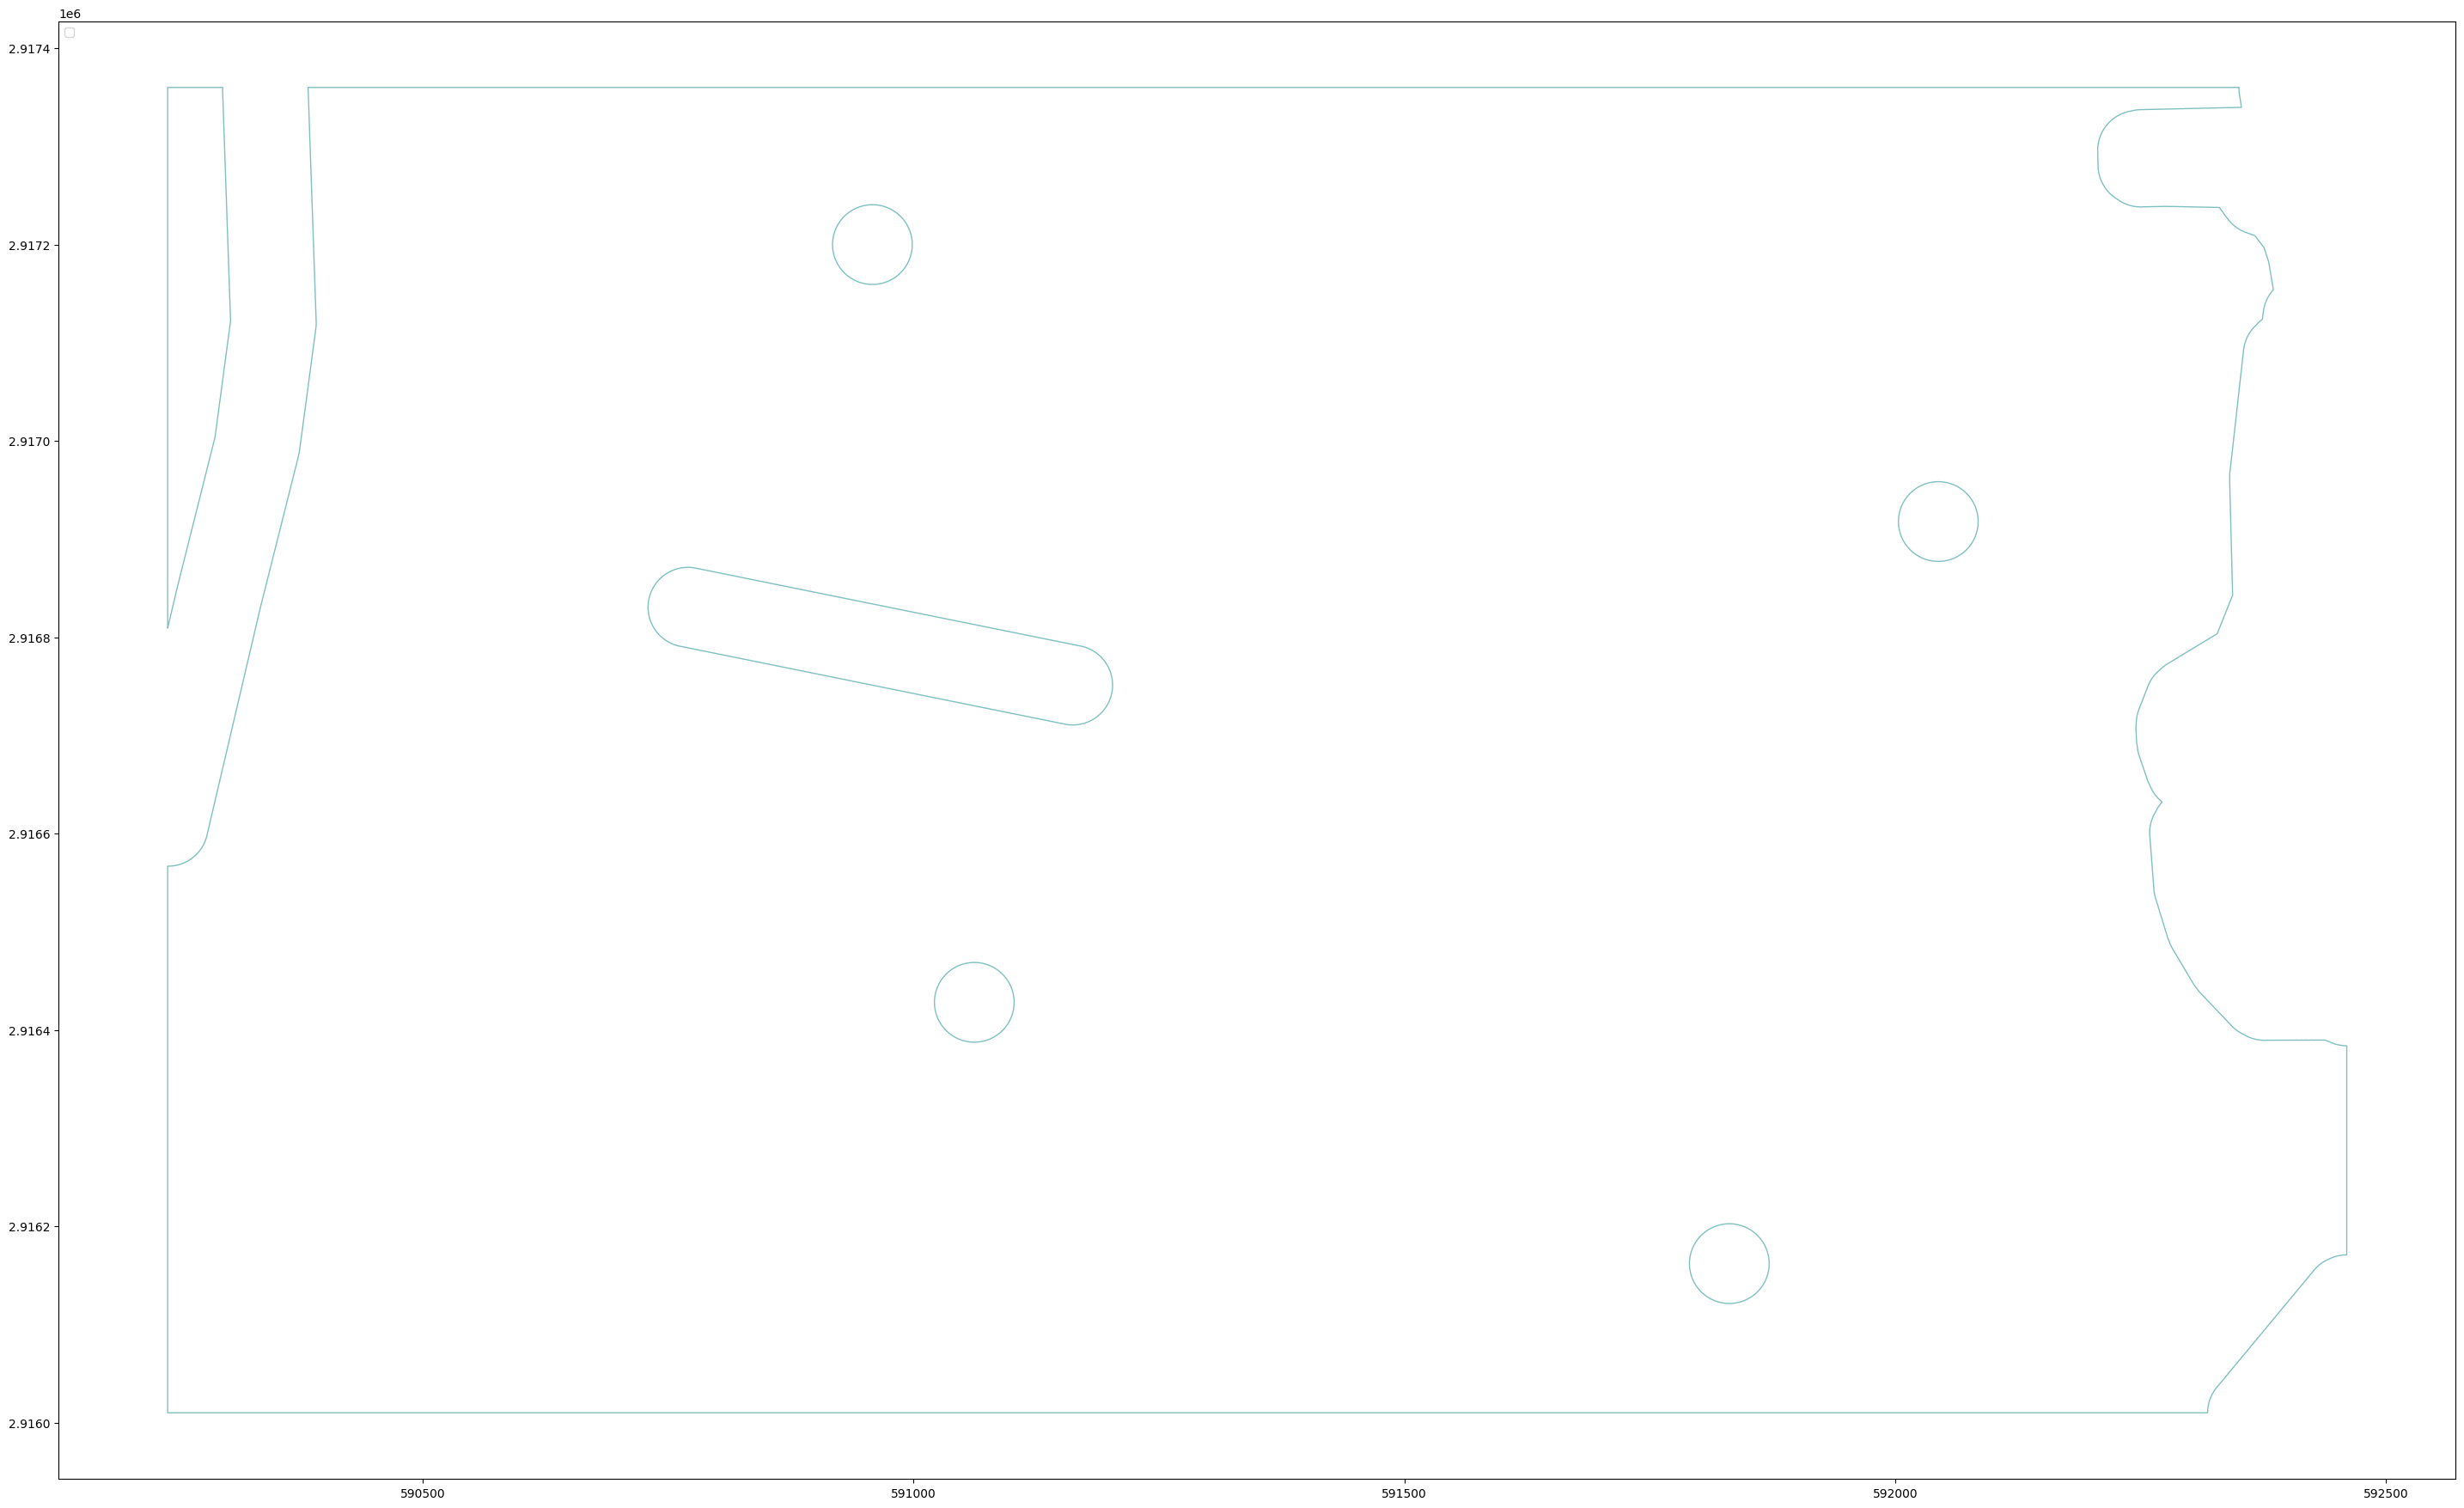

In [5]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

In [6]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/voronoiRegions.shp')

<Axes: >

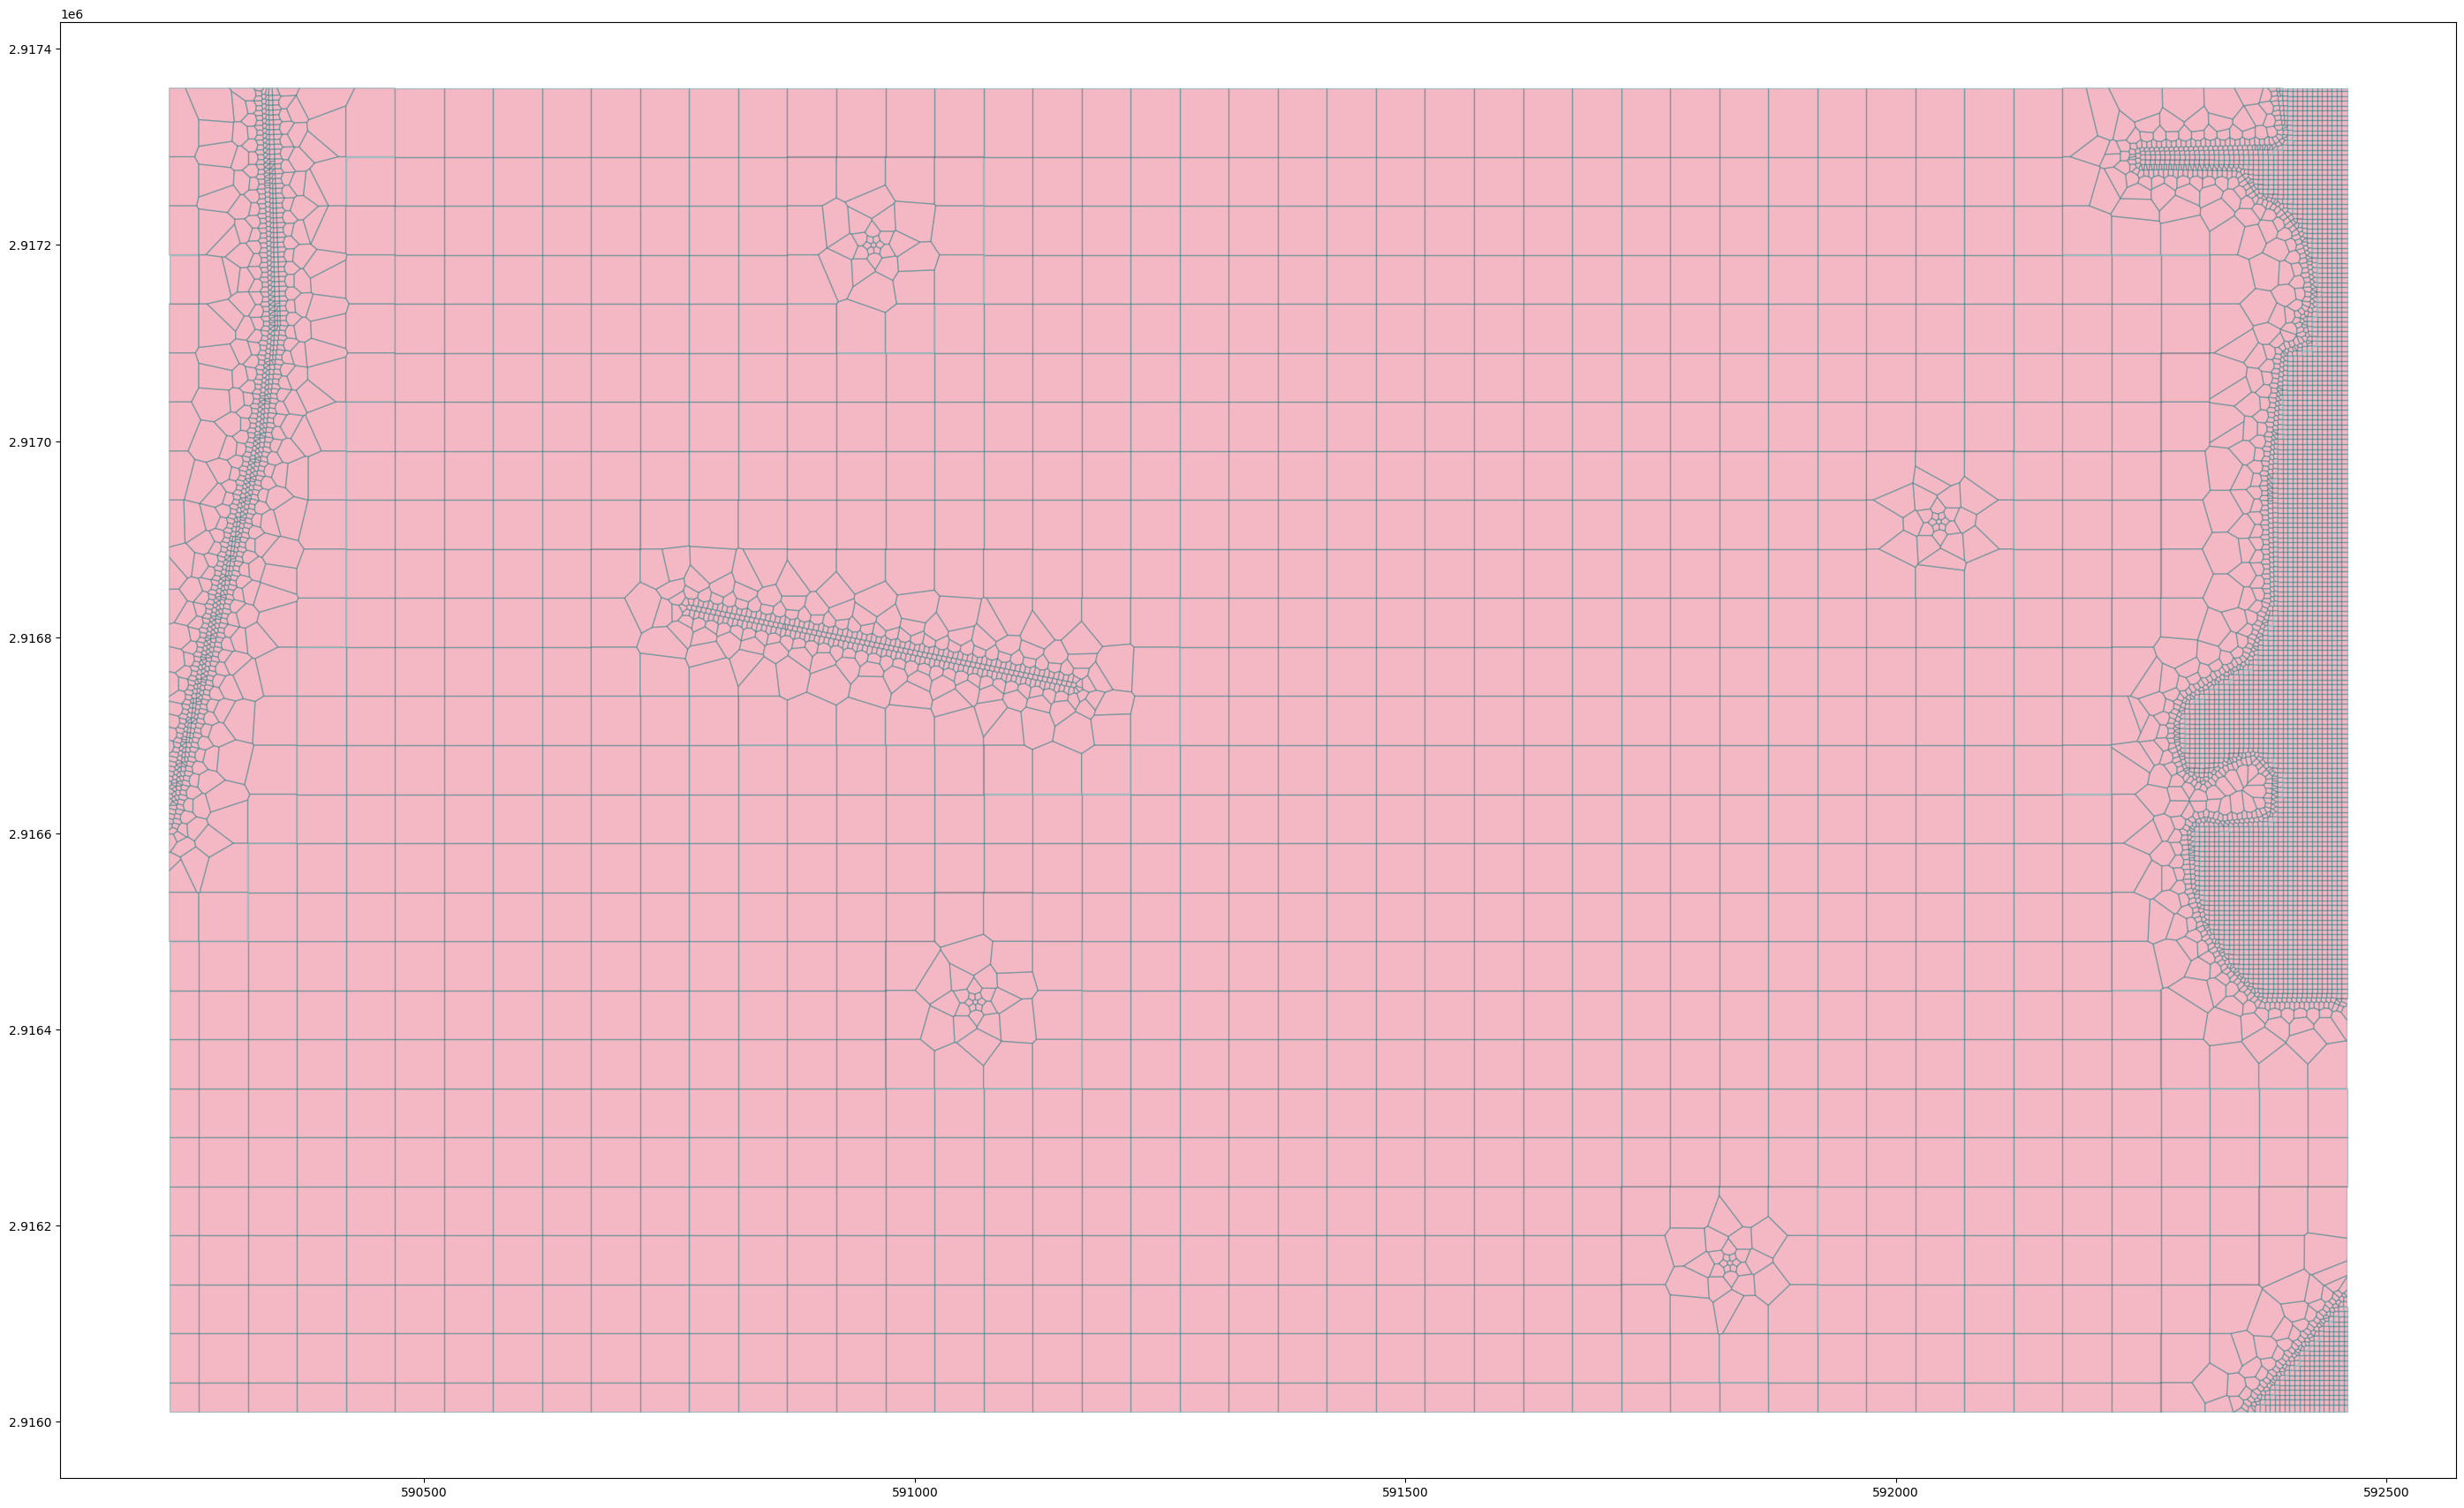

In [7]:
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')